

# Welcome to OpenCV Face/Eye Detection with Webcam LOCUS Project 2017 by Digitronix Nepal
#Project Details

In this project opencv face detection algorithm has been applied to captured webcam images.

For capturing the image and displaying in ,the webcam and HDMI output monitor are required.But we show the output also in this terminal rather than HDMI (we dont have HDMI Connected with PC so)

https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

### Step 1: Load the overlay

In [2]:
from pynq import Overlay
Overlay("base.bit").download()

### Step 2: Initialize Webcam and HDMI Out

In [3]:
# monitor configuration: 640*480 @ 60Hz
#from pynq.drivers.video import HDMI
#hdmi_out = HDMI('out', video_mode=HDMI.VMODE_640x480)
#hdmi_out.start()

In [4]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

In [7]:
# initialize camera from OpenCV
from pynq.drivers.video import Frame
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


### Step 3: Show input frame on HDMI output

In [8]:
# Capture webcam image
import numpy as np


#while 1:
ret, frame_vga = videoIn.read()
#gray = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2GRAY)
    
    #plt.imshow(frame_vga)
    #plt.show()

#Display webcam image via HDMI Out
if (ret):
    print(" Reading from camera")
    #frame_1080p = np.zeros((1080,1920,3)).astype(np.uint8)       
    #frame_1080p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    #hdmi_out.frame_raw(bytearray(frame_1080p.astype(np.int8)))
else:
    print("Error while reading from camera")
    
#cv2.imshow('frame_vga',frame_vga)

 Reading from camera


## store face image using loop

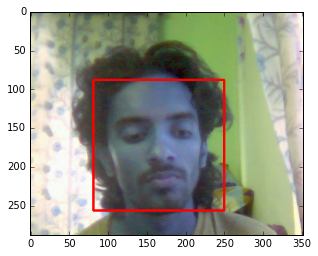

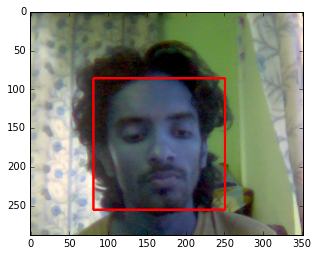

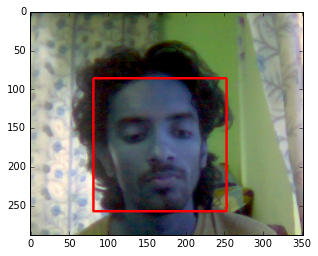

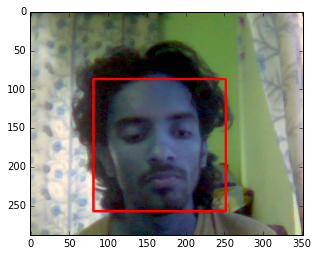

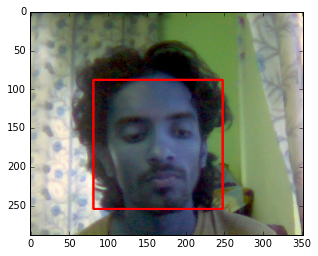

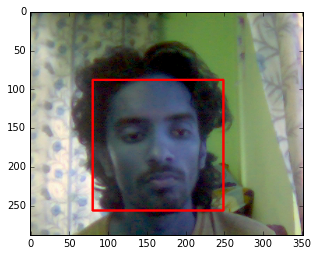

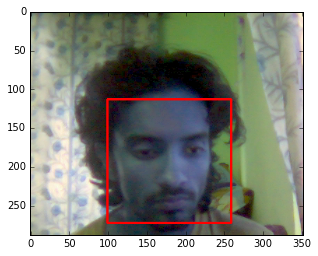

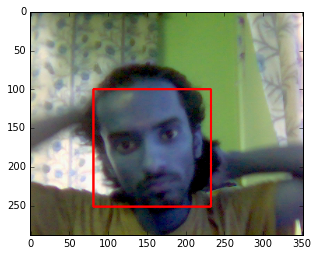

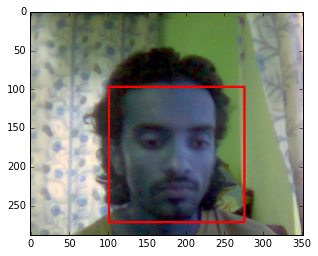

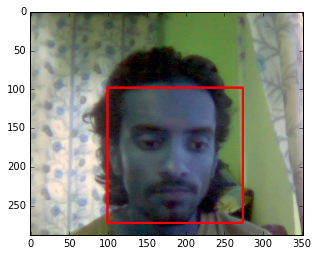

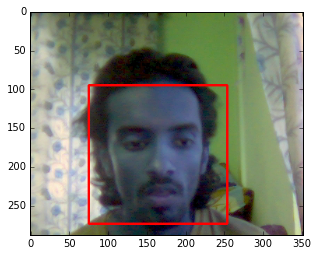

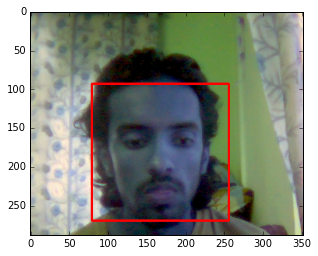

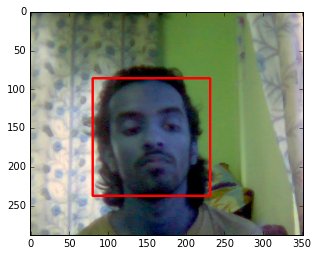

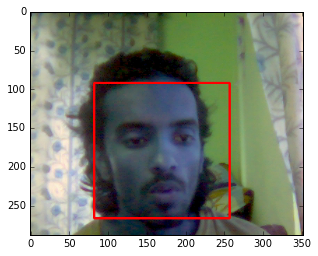

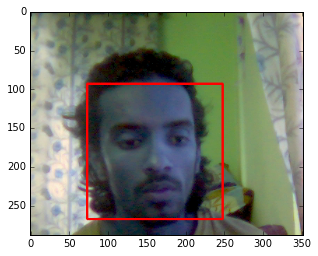

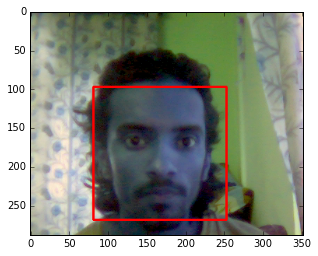

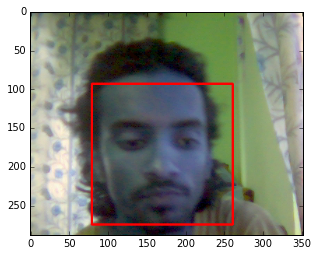

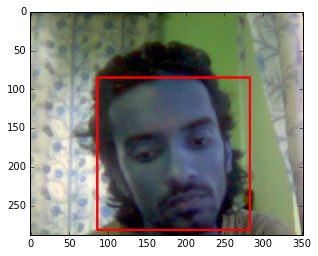

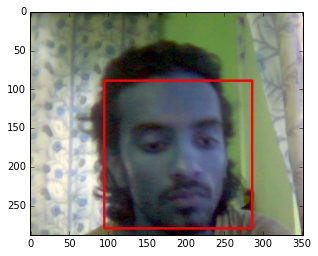

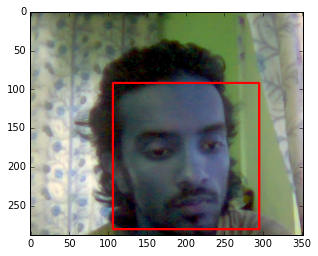

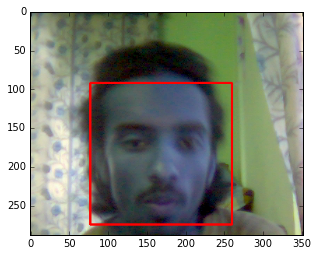

In [10]:
import cv2
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

videoIn = cv2.VideoCapture(0)
sampleNum =0

while 1:
    ret, frame_vga = videoIn.read()
    
    
    face_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame_vga,(x,y),(x+w,y+h),(255,0,0),2)
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame_vga[y:y+h, x:x+w]
        
        crop = frame_vga[y:y+h,x:x+w]
        
        #incrementing sample number 
        sampleNum=sampleNum+1
        
        #saving the captured face in the dataset folder
        cv2.imwrite("data1/User."+'1.'+ str(sampleNum) + ".jpg", crop)
        #cv2.imwrite("uidhuifh"+str(sampleNum)+".jpg",frame_vga)

        plt.imshow(frame_vga)
        
    #wait for 100 miliseconds 
    #if cv2.waitKey(100) & 0xFF == ord('q'):
     #   break
    # break if the sample number is morethan 20
    if sampleNum>20:
        break
    plt.show()

### Step 4: Now use matplotlib to show image inside notebook

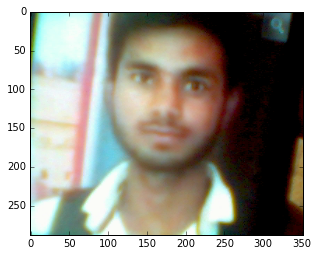

In [9]:
# Output webcam image as JPEG
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame_vga[:,:,[2,1,0]])
# write a image on file on 'face.jpg' is image name
#im = cv2.imwrite('face2.jpg',frame_vga) 
#plt.imshow(frame_vga)
plt.show()

### store a face image on folder name as facedataset and image name as user.ID.sampleno.jpg

2


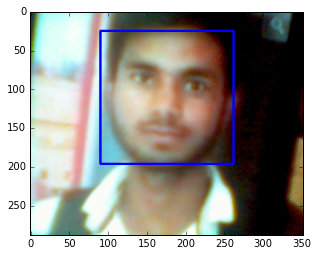

In [10]:
import cv2
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

sampleNum = 0
#frame_vga = cv2.imread('67.jpg')

face_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame_vga,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame_vga[y:y+h, x:x+w]
    
    crop = frame_vga[y:y+h,x:x+w]
    sampleNum=sampleNum+1
    cv2.imwrite("data1/User."+'2.'+ str(sampleNum) + ".jpg", crop)
    print( sampleNum)
    #cv2.imwrite("data1/user"+".3.1.jpg",crop)
    plt.imshow(frame_vga[:,:,[2,1,0]])
    plt.show()
    
#plt.imshow(im)
#plt.show()

## Image Data Trained


In [11]:
import cv2
import os
import numpy as np
from PIL import Image

recognizer = cv2.face.createLBPHFaceRecognizer()
face_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_frontalface_default.xml')
path = 'data1'
def getImagesAndLabels(path):
    #get the path of all the files in the folder
    imagePaths=[os.path.join(path,f) for f in os.listdir(path) if not f.endswith('.ipynb_checkpoints')] 
    #for f in os.listdir(path):
     #   if not f.endswith('.ipynb_checkpoints'):
    #        imagePaths="data1/"+str(f) 
     #       print(imagePaths)
    print(imagePaths)
    #create empth face list
    faceSamples=[]
    
    #create empty ID list
    Ids=[]
    
    #now looping through all the image paths and loading the Ids and the images
    for imagePath in imagePaths:
        
        #loading the image and converting it to gray scale
        pilImage=Image.open(imagePath).convert('L')
        
        #Now we are converting the PIL image into numpy array
        imageNp=np.array(pilImage,'uint8')
        
        #getting the Id from the image
        Id=int(os.path.split(imagePath)[1].split(".")[1])
        print(Id)
        
        # extract the face from the training image sample
        faces=face_cascade.detectMultiScale(imageNp)
        
        #If a face is there then append that in the list as well as Id of it
        for (x,y,w,h) in faces:
            faceSamples.append(imageNp[y:y+h,x:x+w])
            Ids.append(Id)
    return faceSamples,Ids
#print(Ids)

faceSamples,Ids = getImagesAndLabels(path)
recognizer.train(faceSamples, np.array(Ids))
recognizer.save('trainner/trainner1.xml')

['data1/User.1.19.jpg', 'data1/User.1.5.jpg', 'data1/User.1.7.jpg', 'data1/User.1.6.jpg', 'data1/User.1.12.jpg', 'data1/User.1.21.jpg', 'data1/User.1.20.jpg', 'data1/User.1.15.jpg', 'data1/User.1.18.jpg', 'data1/User.2.2.jpg', 'data1/User.1.3.jpg', 'data1/User.1.9.jpg', 'data1/User.1.4.jpg', 'data1/User.1.11.jpg', 'data1/User.1.16.jpg', 'data1/User.1.17.jpg', 'data1/User.1.8.jpg', 'data1/User.1.2.jpg', 'data1/User.1.14.jpg', 'data1/User.1.10.jpg', 'data1/User.1.13.jpg', 'data1/User.1.1.jpg']
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1


##  Recognition face from capturing webcamp 

4
4


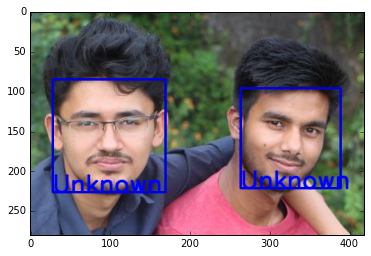

In [17]:
import cv2
import os
import numpy as np
from PIL import Image 
%matplotlib inline 
from matplotlib import pyplot as plt
from pynq.board import LED
from time import sleep
import time

Delay = 0.5
ld1=LED(0)
ld2=LED(1)
#Time = time.strftime("%H:%M")

frame_vga = cv2.imread('2.JPG')
#path = 'data1'

recognizer = cv2.face.createLBPHFaceRecognizer()
recognizer.load('trainner/trainner1.yml')

face_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_frontalface_default.xml')

#imagePaths=[os.path.join(path,f) for f in os.listdir(path)] 
#Id=1
font = cv2.FONT_HERSHEY_SIMPLEX

gray = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray, 1.2,5)

#for image_path in imagepaths:
    
#    predict_image_pil = Image.open(image_path).convert('L')
    
#    predict_image = np.array(predict_image_pil, 'uint8')

for(x,y,w,h) in faces:
    cv2.rectangle(frame_vga,(x,y),(x+w,y+h),(225,0,0),2)
    #cropd = gray[y:y+h,x:x+w]
     
    #nbr_actual = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
    Id = recognizer.predict(gray[y:y+h,x:x+w])
    print(Id)
        
    #if(Id==1):
    #    print('recognition')
    #else:
    #   print("not recognition")
    #if(conf<50):
    if(Id==1):
        Id="suvash"
        ld1.on()
        #sleep(Delay)
        ld2.off()
    else:
        Id="Unknown"
        ld2.on()
        #sleep(Delay)
        ld1.off()
    
    
    cv2.putText(frame_vga,str(Id),(x,y+h),font,1,(255,0,0),2,cv2.LINE_AA)
    #cv2.putText(frame_vga,Time,(y+15,y+h),font,1,(255,0,0),2,cv2.LINE_AA)
        
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()



# HDMI OUTPUT

In [ ]:
# Output OpenCV results via HDMI
#frame_1080p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
#hdmi_out.frame_raw(bytearray(frame_1080p.astype(np.int8)))

### Step 7: Now use matplotlib to show image inside notebook

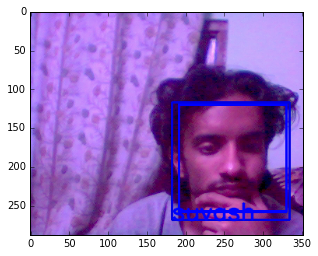

In [9]:
# Output OpenCV results via matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame_vga[:,:,[2,1,0]])
#imf = plt.imread(imh.jpg)
#plt.imshow(crop[:,:,[2,1,0]])
plt.show()

### Step 8: Release camera and HDMI

In [8]:
videoIn.release()
#hdmi_out.stop()
#del hdmi_out
